# An analysis about  Titanic

## 1 问题提出
### 1.1 我想分析的主要问题是：哪些因素会使乘客的生还率更高
之前对泰坦尼克事件有所了解，船上的妇女和儿童大多得到了救援，因此我将着重分析女性和年龄对生还率的影响。此外，买优等舱的乘客大多是富人或上层人士，我猜测这些人生还率也会比较高。因此将主要分析Sex、Age、Pclass三个因素对生还率的影响。

## 2 数据清理
### 2.1 加载csv
加载csv数据，并且查看相关描述性统计。

In [407]:
import pandas as pd
pan_origin_passengers = pd.read_csv('titanic-data.csv')
pan_origin_passengers.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 2.2 查看当前数据集大小

In [408]:
len(pd_origin_passengers)

891

### 2.3 查看当前数据集概况

In [409]:
pan_origin_passengers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2.4 过滤不需要的行数据
由于我之前假定的影响因素包括age、sex、pclass，因此对行数据中这三项是NAN的进行过滤。

In [410]:
# def is_include_NAN(pan_origin_passengers, column_name):
#     null_dataframe = pd.isnull(pan_analysis_passengers[column])
#     null_dataframe_true = null_DataFrame[null_dataframe == True]
#     return len(null_DataFrame_true) > 0

pan_analysis_passengers = pan_origin_passengers.dropna(subset=["Pclass", "Sex", "Age"])
len(pan_analysis_passengers)

714

### 2.5 过滤不需要的列数据
Cabin和Embarked列也有缺失值，且不在分析的因素范围内，把这两列删除。

In [411]:
pan_analysis_passengers = pan_analysis_passengers.dropna(axis=1)
pan_analysis_passengers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500


### 2.6 将Sex转换为整型
male用0表示，female用1表示，如果female生还率更高，在后面计算性别与生还率的相关度时，应该会是一个正数。</br>
查看此时的描述性统计。

In [412]:
# def convert_sex_type(row):
#     if row["Sex"] == "male":
#         return 0
#     else:
#         return 1
# pan_analysis_passengers["Sex"] = pan_analysis_passengers.apply(convert_sex_type, 1)
pan_analysis_passengers['Gender'] = pan_analysis_passengers['Sex'].map({'female':1, 'male':0})
pan_analysis_passengers.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514,0.365546
std,259.119524,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930,0.481921
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.250000,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000,0.000000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700,0.000000
75%,677.750000,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000,1.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200,1.000000


### 2.7 按年龄分组
我很好奇，除了儿童生还率高，生还率是否还与年龄分布有关，因此按照年龄段进行分组。<br/>
首先打上分组标签，每10岁一组。

In [413]:
# def age_flag(passenger):
#     if passenger['Age'] < 10:
#         return 'A'
#     elif passenger['Age'] < 20:
#         return 'B'
#     elif passenger['Age'] < 30:
#         return 'C'
#     elif passenger['Age'] < 40:
#         return 'D'
#     elif passenger['Age'] < 50:
#         return 'E'
#     elif passenger['Age'] < 60:
#         return 'F'
#     else:
#         return 'G'
# pan_analysis_passengers['AgeFlag'] = pan_analysis_passengers.apply(age_flag, 1)
age_bins = np.arange(0, 90, 10)
pan_analysis_passengers['AgeGroup'] = pd.cut(pan_analysis_passengers['Age'], age_bins)
pan_analysis_passengers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Gender,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,"(20, 30]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,"(30, 40]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,1,"(20, 30]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,"(30, 40]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,"(30, 40]"


## 3 相关性及各人群生还率分析

### 3.1 人群基数验证

在计算相关性之前，首先需要保证选择分析的各个变量的人群基数是否合理。人数如果过少，则这类人群的生还率结果无法被信任。<br/>
性别人数分布：

In [414]:
pan_analysis_passengers.groupby('Gender')['PassengerId'].count()

Gender
0    453
1    261
Name: PassengerId, dtype: int64

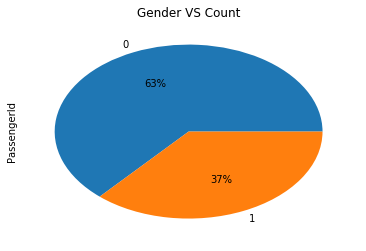

In [415]:
pan_analysis_passengers.groupby('Gender')['PassengerId'].count().plot(kind='pie', autopct='%.0f%%')
plt.title('Gender VS Count')
plt.show()

舱级人数分布：

In [416]:
pan_analysis_passengers.groupby('Pclass')['PassengerId'].count()

Pclass
1    186
2    173
3    355
Name: PassengerId, dtype: int64

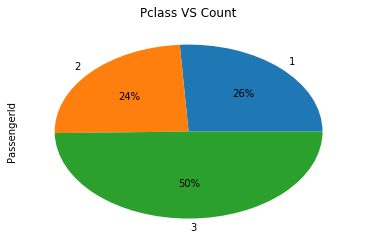

In [417]:
pan_analysis_passengers.groupby('Pclass')['PassengerId'].count().plot(kind='pie', autopct='%.0f%%')
plt.title('Pclass VS Count')
plt.show()

年龄人数分布：

In [418]:
pan_analysis_passengers.groupby('AgeGroup')['PassengerId'].count()

AgeGroup
(0, 10]      64
(10, 20]    115
(20, 30]    230
(30, 40]    155
(40, 50]     86
(50, 60]     42
(60, 70]     17
(70, 80]      5
Name: PassengerId, dtype: int64

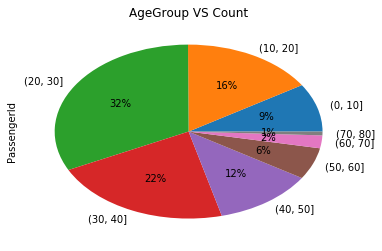

In [419]:
pan_analysis_passengers.groupby('AgeGroup')['PassengerId'].count().plot(kind='pie', autopct='%.0f%%')
plt.title('AgeGroup VS Count')
plt.show()

60岁以上人群占比非常少，可以把60岁以上的数据视为一组或忽略不计。

### 3.2 计算相关性
分别用自定义函数和numpy的corrcoef计算性别、年龄、舱级与生还率的相关性。

In [420]:
def correlation(x, y):
    std_x = (x - x.mean()) / x.std(ddof=0)
    std_y = (y - y.mean()) / y.std(ddof=0)
    return (std_x * std_y).mean()

print correlation(pan_analysis_passengers["Gender"], pan_analysis_passengers["Survived"])
print correlation(pan_analysis_passengers["Age"], pan_analysis_passengers["Survived"])
print correlation(pan_analysis_passengers["Pclass"], pan_analysis_passengers["Survived"])

0.538825593015
-0.0772210945722
-0.359652682087


In [421]:
import numpy as np

print np.corrcoef(pan_analysis_passengers["Gender"], pan_analysis_passengers["Survived"])
print np.corrcoef(pan_analysis_passengers["Age"], pan_analysis_passengers["Survived"])
print np.corrcoef(pan_analysis_passengers["Pclass"], pan_analysis_passengers["Survived"])

[[ 1.          0.53882559]
 [ 0.53882559  1.        ]]
[[ 1.         -0.07722109]
 [-0.07722109  1.        ]]
[[ 1.         -0.35965268]
 [-0.35965268  1.        ]]


通过计算出的相关性可以看出：女性会使生还率大大提高；Pclass越小生还率越高，证明高级舱乘客的生还率较高；年龄的影响看起来比较微小，可能是因为青年成年老年和生还率的相关性不高，影响了儿童的表现。

### 3.3 各人群生还率具体分析

性别只有男女两种，很难仔细通过相关性得出结论，下面具体分析男和女的生还率。

In [422]:
male_passengers = pan_analysis_passengers[pan_analysis_passengers["Gender"] == 0]
male_passengers["Survived"].mean()

0.2052980132450331

In [423]:
male_passengers = pan_analysis_passengers[pan_analysis_passengers["Gender"] == 1]
male_passengers["Survived"].mean()

0.7547892720306514

各舱级具体生还率分析。

In [424]:
p1_passengers = pan_analysis_passengers[pan_analysis_passengers["Pclass"] == 1]
p2_passengers = pan_analysis_passengers[pan_analysis_passengers["Pclass"] == 2]
p3_passengers = pan_analysis_passengers[pan_analysis_passengers["Pclass"] == 3]
print(p1_passengers["Survived"].mean(), p2_passengers["Survived"].mean(), p3_passengers["Survived"].mean())

(0.6559139784946236, 0.4797687861271676, 0.23943661971830985)


儿童生还率分析，我将提取出10岁、15岁的乘客，看一下他们的生还率均值是否明显优于平均水平。

In [425]:
children = pan_analysis_passengers[pan_analysis_passengers["Age"] < 10]
children["Survived"].mean()

0.6129032258064516

In [426]:
children = pan_analysis_passengers[pan_analysis_passengers["Age"] < 15]
children["Survived"].mean()

0.5769230769230769

In [427]:
children = pan_analysis_passengers[pan_analysis_passengers["Age"] < 25]
print correlation(children["Age"], children["Survived"])

-0.214052711504


0.58、0.61均明显高于总体生还率均值0.41，而从年龄小于25的人群中计算相关性，也可以看出年龄与生还率的相关性有显著提高。

## 4 综合分析

### 4.1 按年龄分组
首先查看各年龄组的生还率情况。

In [428]:
passengers_groupby_age = pan_analysis_passengers.groupby('AgeGroup')
passengers_groupby_age['Survived'].describe()

,count,mean,std,min,25%,50%,75%,max
AgeGroup,,,,,,,,
"(0, 10]",64.0,0.593750,0.495015,0.0,0.0,1.0,1.0,1.0
"(10, 20]",115.0,0.382609,0.488151,0.0,0.0,0.0,1.0,1.0
"(20, 30]",230.0,0.365217,0.482541,0.0,0.0,0.0,1.0,1.0
"(30, 40]",155.0,0.445161,0.498595,0.0,0.0,0.0,1.0,1.0
"(40, 50]",86.0,0.383721,0.489143,0.0,0.0,0.0,1.0,1.0
"(50, 60]",42.0,0.404762,0.496796,0.0,0.0,0.0,1.0,1.0
"(60, 70]",17.0,0.235294,0.437237,0.0,0.0,0.0,0.0,1.0
"(70, 80]",5.0,0.200000,0.447214,0.0,0.0,0.0,0.0,1.0


由上面分析可以看出，生还率均值随年龄增长逐渐减低（20-40和40-60的生还率情况差不多）。<br/>
用图展示起来会更直观。

Populating the interactive namespace from numpy and matplotlib


Text(0,0.5,u'Survived')

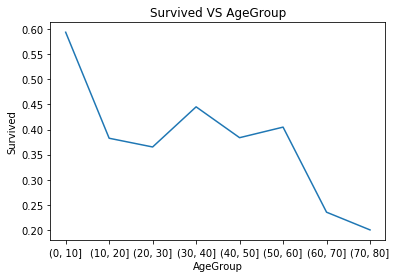

In [429]:
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns
passengers_groupby_age["Survived"].mean().plot()
plt.title('Survived VS AgeGroup')
plt.xlabel('AgeGroup')
plt.ylabel('Survived')

### 4.2 按舱级分组
由上面按年龄分组，使我对生还率随舱级的变化也产生兴趣，想知道p2和p3舱级的生还率是否相差明显。

In [430]:
passengers_groupby_pclass = pan_analysis_passengers.groupby('Pclass')
passengers_groupby_pclass['Survived'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,186.0,0.655914,0.476352,0.0,0.0,1.0,1.0,1.0
2,173.0,0.479769,0.501041,0.0,0.0,0.0,1.0,1.0
3,355.0,0.239437,0.427342,0.0,0.0,0.0,0.0,1.0


Text(0,0.5,u'Survived')

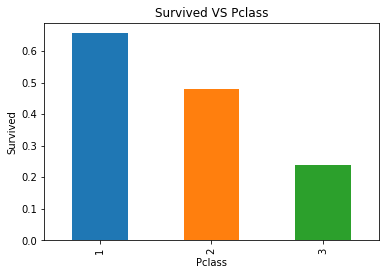

In [431]:
passengers_groupby_pclass["Survived"].mean().plot(kind='bar')
plt.title('Survived VS Pclass')
plt.xlabel('Pclass')
plt.ylabel('Survived')

结果很明显，p2舱乘客生还率要比p3高出两倍多。

### 4.3 综合年龄、舱级、性别进行分析

In [432]:
passengers_groupby_apm = pan_analysis_passengers.groupby(['AgeGroup', 'Pclass', 'Gender'])
passengers_groupby_apm['Survived'].describe()

count      mean       std  min  25%  50%   75%  max
AgeGroup Pclass Gender                                                     
(0, 10]  1      0         2.0  1.000000  0.000000  1.0  1.0  1.0  1.00  1.0
                1         1.0  0.000000       NaN  0.0  0.0  0.0  0.00  0.0
         2      0         9.0  1.000000  0.000000  1.0  1.0  1.0  1.00  1.0
                1         8.0  1.000000  0.000000  1.0  1.0  1.0  1.00  1.0
         3      0        22.0  0.363636  0.492366  0.0  0.0  0.0  1.00  1.0
                1        22.0  0.500000  0.511766  0.0  0.0  0.5  1.00  1.0
(10, 20] 1      0         5.0  0.400000  0.547723  0.0  0.0  0.0  1.00  1.0
                1        13.0  1.000000  0.000000  1.0  1.0  1.0  1.00  1.0
         2      0        10.0  0.100000  0.316228  0.0  0.0  0.0  0.00  1.0
                1         8.0  1.000000  0.000000  1.0  1.0  1.0  1.00  1.0
         3      0        54.0  0.129630  0.339050  0.0  0.0  0.0  0.00  1.0
                1        25.0  0.520000  0.509902  0.0  0.0  1.0  1.00  1.0
(20, 30] 1      0        19.0  0.473684  0.512989  0.0  0.0  0.0  1.00  1.0
                1        21.0  0.952381  0.218218  0.0  1.0  1.0  1.00  1.0
         2      0        33.0  0.000000  0.000000  0.0  0.0  0.0  0.00  0.0
                1        28.0  0.892857  0.314970  0.0  1.0  1.0  1.00  1.0
         3      0        97.0  0.144330  0.353250  0.0  0.0  0.0  0.00  1.0
                1        32.0  0.500000  0.508001  0.0  0.0  0.5  1.00  1.0
(30, 40] 1      0        25.0  0.520000  0.509902  0.0  0.0  1.0  1.00  1.0
                1        24.0  1.000000  0.000000  1.0  1.0  1.0  1.00  1.0
         2      0        26.0  0.115385  0.325813  0.0  0.0  0.0  0.00  1.0
                1        17.0  0.941176  0.242536  0.0  1.0  1.0  1.00  1.0
         3      0        49.0  0.142857  0.353553  0.0  0.0  0.0  0.00  1.0
                1        14.0  0.428571  0.513553  0.0  0.0  0.0  1.00  1.0
(40, 50] 1      0        24.0  0.375000  0.494535  0.0  0.0  0.0  1.00  1.0
                1        13.0  0.923077  0.277350  0.0  1.0  1.0  1.00  1.0
         2      0         9.0  0.111111  0.333333  0.0  0.0  0.0  0.00  1.0
                1        10.0  0.900000  0.316228  0.0  1.0  1.0  1.00  1.0
         3      0        22.0  0.090909  0.294245  0.0  0.0  0.0  0.00  1.0
                1         8.0  0.000000  0.000000  0.0  0.0  0.0  0.00  0.0
(50, 60] 1      0        14.0  0.285714  0.468807  0.0  0.0  0.0  0.75  1.0
                1        11.0  1.000000  0.000000  1.0  1.0  1.0  1.00  1.0
         2      0         9.0  0.000000  0.000000  0.0  0.0  0.0  0.00  0.0
                1         3.0  0.666667  0.577350  0.0  0.5  1.0  1.00  1.0
         3      0         5.0  0.000000  0.000000  0.0  0.0  0.0  0.00  0.0
(60, 70] 1      0         9.0  0.000000  0.000000  0.0  0.0  0.0  0.00  0.0
                1         2.0  1.000000  0.000000  1.0  1.0  1.0  1.00  1.0
         2      0         3.0  0.333333  0.577350  0.0  0.0  0.0  0.50  1.0
         3      0         2.0  0.000000  0.000000  0.0  0.0  0.0  0.00  0.0
                1         1.0  1.000000       NaN  1.0  1.0  1.0  1.00  1.0
(70, 80] 1      0         3.0  0.333333  0.577350  0.0  0.0  0.0  0.50  1.0
         3      0         2.0  0.000000  0.000000  0.0  0.0  0.0  0.00  0.0

从上面可以大致看出，性别对生还率的影响是巨大的，年龄和舱级相同的情况下，女性的生还率都远远高于男性。<br/>
### 4.4 两个变量的综合作用对比
所以，下面我将分析一下综合分析一下两个因素共同作用时，生还率情况。<br/>
不同年龄段下，性别不同的生还情况：

Text(0,0.5,u'Survived')

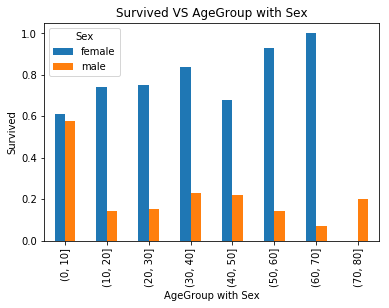

In [433]:
pan_analysis_passengers.groupby(['AgeGroup', 'Sex'])['Survived'].mean().unstack().plot(kind='bar')
plt.title('Survived VS AgeGroup with Sex')
plt.xlabel('AgeGroup with Sex')
plt.ylabel('Survived')

不同年龄段下，舱级不同的生还情况：

Text(0,0.5,u'Survived')

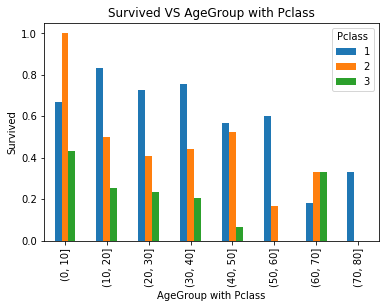

In [434]:
pan_analysis_passengers.groupby(['AgeGroup', 'Pclass'])['Survived'].mean().unstack().plot(kind='bar')
plt.title('Survived VS AgeGroup with Pclass')
plt.xlabel('AgeGroup with Pclass')
plt.ylabel('Survived')

舱级不同情况下，男女生还率情况：

Text(0,0.5,u'Survived')

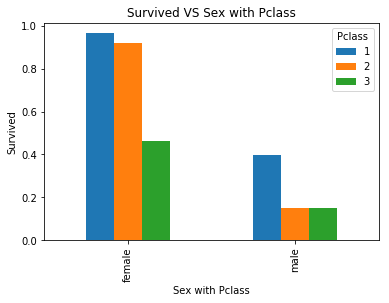

In [435]:
pan_analysis_passengers.groupby(['Sex', 'Pclass'])['Survived'].mean().unstack().plot(kind='bar')
plt.title('Survived VS Sex with Pclass')
plt.xlabel('Sex with Pclass')
plt.ylabel('Survived')

### 4.5 统计检验：
针对男女两个群体的t检验：零假设是男女群体的生还率没有差异。

In [436]:
import scipy

X = pan_analysis_passengers[pan_analysis_passengers['Gender'] == 1]['Survived']
Y = pan_analysis_passengers[pan_analysis_passengers['Gender'] == 0]['Survived']
print scipy.stats.ttest_ind(X,Y) 

Ttest_indResult(statistic=17.067146369266009, pvalue=5.2247099268015708e-55)


计算得到的p值是5.2247099268015708e-55，说明观察到的差异是由随机因数引起的概率远小于0.005，说明女性生还率更高。

针对p1和p2舱以及p2和p3分别进行两个群体的t检验：零假设是不同舱级群体的生还率没有差异。

In [437]:
X = pan_analysis_passengers[pan_analysis_passengers['Pclass'] == 1]['Survived']
Y = pan_analysis_passengers[pan_analysis_passengers['Pclass'] == 2]['Survived']
print scipy.stats.ttest_ind(X,Y) 
X = pan_analysis_passengers[pan_analysis_passengers['Pclass'] == 2]['Survived']
Y = pan_analysis_passengers[pan_analysis_passengers['Pclass'] == 3]['Survived']
print scipy.stats.ttest_ind(X,Y) 

Ttest_indResult(statistic=3.4144855360839115, pvalue=0.00071249270727511294)
Ttest_indResult(statistic=5.7248105842685337, pvalue=1.741869407625977e-08)


计算得到的p值分别是0.00071249270727511294和1.741869407625977e-08，说明观察到的差异是由随机因数引起的概率远小于0.005，说明舱级越高生还率越高。

## 5 结论
### 5.1 样本说明
分析样本数是741，整体年龄、舱级、性别分布比例合理，比较具有代表性。
### 5.2 缺失值说明
分析前，舍弃了数据集中性别缺失的数据，这种做法会影响之后分析结果的准确性。<br/>
如缺失数据男性比例较高且生还率较高，那么后面分析得出的男性生还率均值相较总体均值其实是偏低的。
### 5.3 分析结果说明
同等条件下，女性的生还率是远远高于男性的，尤其是在p1、p2舱级的情况下，相差甚至达到9倍。<br/>
较小年龄与生还率相关性较高。<br/>
舱级与生还率相关性也很高，样本中舱级高生还率也较高。<br/>
通过以上分析，可以看出性别、年龄、舱级与生还概率相关程度都比较高，但是我并不能因此得出一个必然的结论说这些因素与生还率有因果性。<br/>
因为我还无法进行一个ABtest来验证。
### 5.4 一些问题
在20-40岁男性范围里，p2舱级的生还率反而低于p3,这让人有一些诧异。
另外还观察到有一位60岁以上的p2舱男性活了下来，这也有些说不通。
所以还是存在一些其他因素影响着生还率的。

# 6 题外音
## 6.1 船上有配偶或兄妹的人有多少，和生还率关系怎样

In [438]:
len(pan_analysis_passengers[pan_analysis_passengers["SibSp"] > 0])

243

数据集中有配偶或兄妹的人有243人

Text(0,0.5,u'Survived')

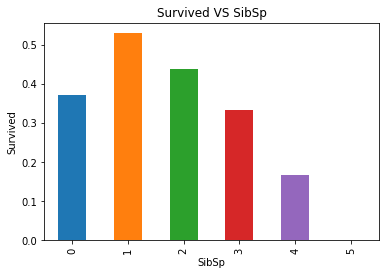

In [439]:
sibsp_passengers = pan_analysis_passengers.groupby(["SibSp"])
sibsp_passengers['Survived'].mean().plot(kind='bar')
plt.title('Survived VS SibSp')
plt.xlabel('SibSp')
plt.ylabel('Survived')

## 6.2 船上有父母或子女的人有多少，和生还率的关系怎样

In [440]:
len(pan_analysis_passengers[pan_analysis_passengers["Parch"] > 0])

193

Text(0,0.5,u'Survived')

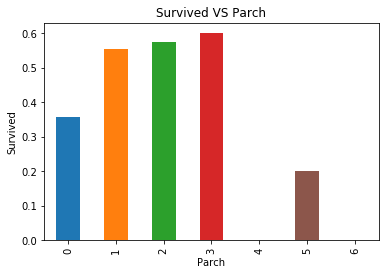

In [441]:
parch_passengers = pan_analysis_passengers.groupby(["Parch"])
parch_passengers['Survived'].mean().plot(kind='bar')
plt.title('Survived VS Parch')
plt.xlabel('Parch')
plt.ylabel('Survived')

# 7 参考资料
https://www.cnblogs.com/wuzhiblog/p/python_pandas.html<br\>
http://blog.csdn.net/leonis_v/article/details/51832916<br\>
https://www.cnblogs.com/chaosimple/p/4153083.html<br\>
https://www.dataquest.io/m/12/working-with-missing-data<br\>
http://blog.csdn.net/hjh00/article/details/48530183